# Fundação Getúlio Vargas
# Mestrado em Modelagem Informacional
# Visualização da Informação
# Trabalho II: Análise e Reprodução de uma visualização reconhecida ou relevante Historicamente

Aluna: Juliana Carvalho de Souza   

Curso: Graduação em Matemática Aplicada/4o Período

Professora: Asla Medeiros e Sá

Data: 2 de Novembro de 2021


Uma visualização importante foi a do Gapminder, proposta por Hans Rosling em 2005, como detalhado em <https://www.washingtonpost.com/news/wonk/wp/2017/02/08/remembering-hans-rosling-the-visualization-pioneer-who-made-data-dance/>. A visualização dinâmica explorava problemas de desenvolvimento social utilizando gráficos de bolhas. A palestra de 2006 do TedTalks entitulada "The best stats you've ever seen" e disponível em [https://www.ted.com/talks/hans_rosling_the_best_stats_you_ve_ever_seen/transcript#t-288456] foi responsável por popularizar a chamada "storytellyng with data". Além desse vídeo, outro que fez sucesso foi o da BBC, disponível em: https://www.youtube.com/watch?v=jbkSRLYSojo&t=4s

Segundo Rosling and Johansson, 2009:

"The main innovation from Gapminder is so far 'the moving bubble chart' in the form of the Trendalyzer software that was acquired by Google in 2007. Google has made a 2008 version freely available as Google Motion Chart. Gapminder is a non-profit foundation founded in 2005 with a goal of '…increase use and understanding of statistics and other information about social, economic and environmental development at local, national and global levels.” 

Uma das visualizações geradas por Rosling relaciona a taxa de fecundidade com a expectativa de vida ao nascer de países de todos os continentes do globo. Para isso, utiliza-se bolhas proporcionais às populações desses países. O único acesso que consegui da visualização está disponível abaixo e, por ser de um vídeo de 2007 (disponível no link acima), não ficou com uma qualidade razoável.

Entretanto, mneste trabalho nos propomos a reproduzi-la, utilizando como ferramentas bibliotecas do Python, como o matplotlib e o plotly.

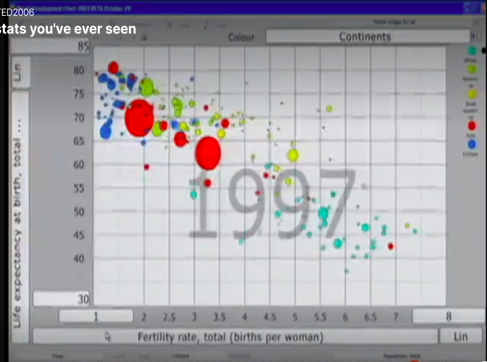

In [217]:
from PIL import Image
image = Image.open("visualizacao_original_2.png")

imagem_fertility_expectancy = image.resize((487, 362))
imagem_fertility_expectancy

# Parte 1: Encontrar os dados 

Parte dos dados do Gapminder já estavam implementados na biblioteca plotly.express. Incluia, como será possível ver a seguir, nome dos países, continentes, população e a expectativa de vida. Os dados de fertility rate foram extraído do site do Gapminder (https://www.gapminder.org/data/), por meio de um documento csv. Para incorporá-lo aos demais dados, utilizei apenas o código desse notebook. Entre as ações realizadas, inclui uma nova coluna para indicar a taxa de fecundidade no dataframe do gapminder oferecido pelo plotly.express. Em seguida, cada tupla teve o novo valor de fertility rate conforme ano e country em comum com os dados extraídos do documento csv.


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import csv

In [4]:
import plotly.express as px
import plotly.offline as py
py.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly.figure_factory import create_table

from vega_datasets import data


In [210]:
# Carrega os dados disponíveis em plotly express
gapminder = px.data.gapminder()
print(len(gapminder))
gapminder["childs_per_woman"] = -1.0
gapminder

1704


,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,childs_per_woman
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,-1.0
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,-1.0
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,-1.0
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,-1.0
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,-1.0
...,...,...,...,...,...,...,...,...,...
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306,ZWE,716,-1.0
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786,ZWE,716,-1.0
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960,ZWE,716,-1.0
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623,ZWE,716,-1.0


In [211]:

data = pd.read_csv('children_per_woman_total_fertility.csv')
# Using DataFrame.drop
data.drop(data.columns[list(range(len(data.columns)-92, len(data.columns)))], axis=1, inplace=True)
data

,country,1799,1800,1801,1802,1803,1804,1805,1806,1807,...,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007
0,Aruba,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,5.64,...,1.91,1.87,1.85,1.83,1.81,1.79,1.77,1.75,1.74,1.73
1,Afghanistan,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,7.00,...,7.57,7.49,7.39,7.27,7.14,6.99,6.83,6.65,6.46,6.25
2,Angola,6.93,6.93,6.93,6.93,6.93,6.93,6.93,6.94,6.94,...,6.68,6.64,6.60,6.57,6.54,6.50,6.47,6.42,6.37,6.31
3,Albania,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,4.60,...,2.25,2.16,2.07,1.98,1.90,1.82,1.75,1.70,1.67,1.65
4,Netherlands Antilles,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,5.80,...,2.11,2.10,2.10,2.09,2.07,2.06,2.04,2.02,1.99,1.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,Samoa,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,6.98,...,4.54,4.50,4.48,4.46,4.45,4.46,4.46,4.46,4.45,4.43
198,Yemen,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,6.88,...,6.51,6.31,6.13,5.95,5.78,5.60,5.43,5.25,5.09,4.94
199,South Africa,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,6.47,...,2.87,2.83,2.79,2.76,2.73,2.70,2.68,2.66,2.64,2.62
200,Zambia,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,6.71,...,6.07,6.04,6.00,5.96,5.92,5.86,5.79,5.72,5.64,5.56


In [221]:
#Manipulacao realizada: editando dados da nova coluna: o valor de childs per woman é inserido entre tuplas com o mesmo
#country e ano

for (idx, row) in gapminder.iterrows():
    for (idx_data, row_data) in data.iterrows():
        if(row_data.loc['country'] == row.loc["country"]):
            gapminder.at[idx,'childs_per_woman']=  row_data.loc[str(row.loc["year"])]


Vamos também obter alguma informação sobre esses dados.

In [174]:
gapminder.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap',
       'iso_alpha', 'iso_num', 'childs_per_woman'],
      dtype='object')

In [175]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           1704 non-null   object 
 1   continent         1704 non-null   object 
 2   year              1704 non-null   int64  
 3   lifeExp           1704 non-null   float64
 4   pop               1704 non-null   int64  
 5   gdpPercap         1704 non-null   float64
 6   iso_alpha         1704 non-null   object 
 7   iso_num           1704 non-null   int64  
 8   childs_per_woman  1704 non-null   float64
dtypes: float64(3), int64(3), object(3)
memory usage: 119.9+ KB


In [176]:
gapminder.describe()

,year,lifeExp,pop,gdpPercap,iso_num,childs_per_woman
count,1704.00000,1704.000000,1.704000e+03,1704.000000,1704.000000,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081,425.880282,4.368944
std,17.26533,12.917107,1.061579e+08,9857.454543,248.305709,2.281989
min,1952.00000,23.599000,6.001100e+04,241.165877,4.000000,-1.000000
25%,1965.75000,48.198000,2.793664e+06,1202.060309,208.000000,2.360000
50%,1979.50000,60.712500,7.023596e+06,3531.846989,410.000000,4.695000
75%,1993.25000,70.845500,1.958522e+07,9325.462346,638.000000,6.450000
max,2007.00000,82.603000,1.318683e+09,113523.132900,894.000000,8.450000


In [177]:
create_table(gapminder.head()) 

# Parte 2: Fazer uma análise de qual seria a função pretendida com a visualização proposta.

A função pretendida com a visualização proposta é de Exploração, pois busca surpreender o público com expectativas que vão além do senso comum sobre o desenvolvimento social e também de Explanação, já que um storytelling é criado (o autor inclui diversos eventos históricos como Guerras e doenças que modificaram a população).

Assim, questiona-se o senso comum de que países do terceiro mundo são aqueles que tem maior expectativa de vida e menor fecundidae -- em oposição aos países de primeiro mundo. Isso pode ser claramente visto com a ascenção de países asiáticos (como a China) e países latino americanos, por meio das posições das diferentes bolhas. Veja que quanto mais ao canto superior esquerdo, menor é a fecundidade e maior é a expectativa de vida.

# Parte3: Fazer uma reprodução da visualização escolhida utilizando uma ferramenta computacional atual (de preferência a mesma escolhida por vocês no trabalho 1) 

Na reprodução utilizei a biblioteca px.scatter do Plotly, conforme animação produzida pelo código abaixo.

In [250]:
#adding animation to bubble plot
px.scatter(gapminder,x='childs_per_woman',y='lifeExp',color='continent', color_discrete_sequence=["red", "blue", "yellow", "green", "#C8FF33"], size='pop',size_max=70,
          hover_name='country', animation_frame='year',
          animation_group='country', range_x=[0,8], range_y=[30,90], labels={"lifeExp": "Life expectancy at birth, total ...", "childs_per_woman":"Fertility rate, total (birth by woman)"})



# Parte4: Propor alguma modificação (fundamentando conceitualmente) na visualização proposta. Exemplo: Incluir anotação, incluir interatividade, modificar título ou legenda, adicionar informação, etc.

O Bubble Chart utilizado identifica de maneira clara os dados representados, pois permite mostrar 3 variávies distintas (Expectativa de vida, taxa de fecundidade e relação entre o tamanho da população) e a animação mostra a sua evolução ao longo do tempo. A única modificação sugerida (que eu pelo menos não consegui observar na palestra original) é colocar um título no visualização que seja descritivo com o conteúdo. Ademais, como o autor cita a América Latina e os países do Oriente Médio na palestra, seria também interessante categorizá-los por cor.

# Bônus: Visualização com outra base de dados

Entre as dificuldade encontradas para reproduzir a visualização históricas estava o fato de Hans Rosling ter realizado diversas visualizações e por isso encontramos várias animações e bases de dados distintas pela internet. A base de dados a seguir reune os dados das visualizações das duas palestras mais famosas do acadêmico. Esses dados estão disponíveis em: https://raw.githubusercontent.com/theengineeringworld/statistics-using-python/master/gapminder.xls e de acordo com o autor (que trabalha no canal 
TheEngineeringWorld e mostra um notebook Jupyter com os dados em: https://www.youtube.com/watch?v=VdWfB30QTYI&t=87s) foram extraídos do site GapMinder (https://www.gapminder.org/). Entretanto, não há informações sobre como foi feita a limpeza dos dados.

In [234]:
from IPython import display
from ipywidgets import interact, widgets
import matplotlib.pyplot as pp

In [238]:
gapminder2 = pd.read_csv("gapminder.csv")
gapminder2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  float64
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  float64
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 1.0+ MB


In [251]:
#adding animation to bubble plot
px.scatter(gapminder2,x='babies_per_woman',y='life_expectancy',color='region', color_discrete_sequence=["red", "blue", "yellow", "green", "#C8FF33"], size='population',size_max=80,
          hover_name='country', animation_frame='year',
          animation_group='country', labels={"life_expectancy": "Life expectancy at birth, total ...", "babies_per_woman":"Fertility rate, total (birth by woman)"})

interactive(children=(IntSlider(value=1950, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

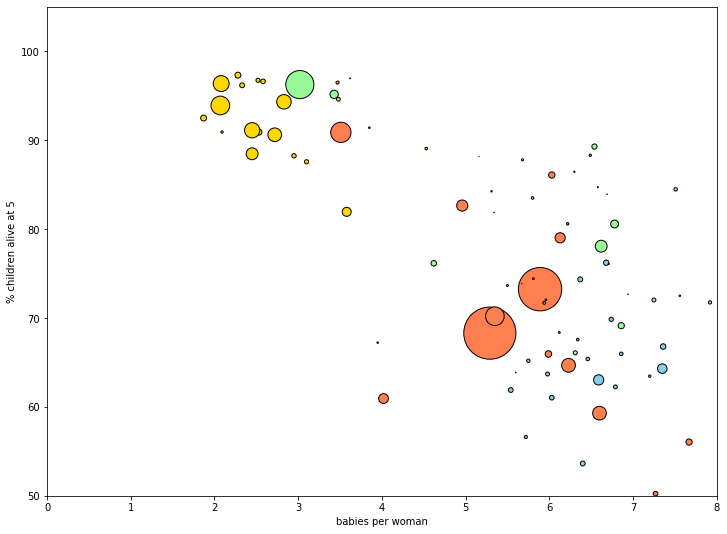

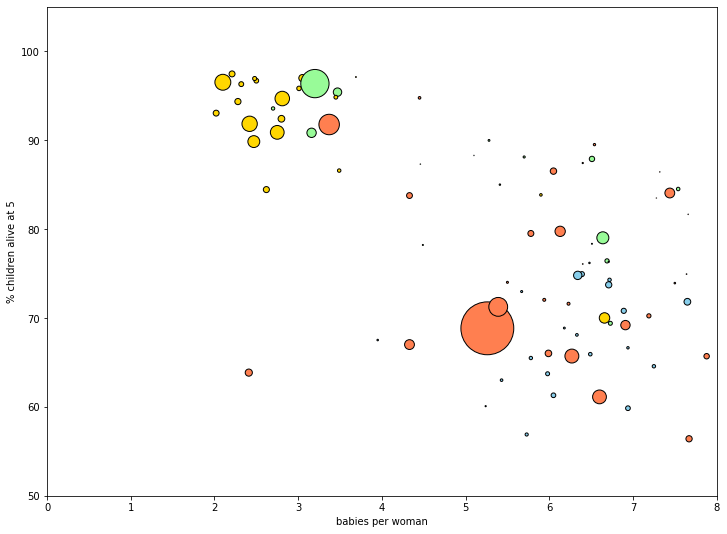

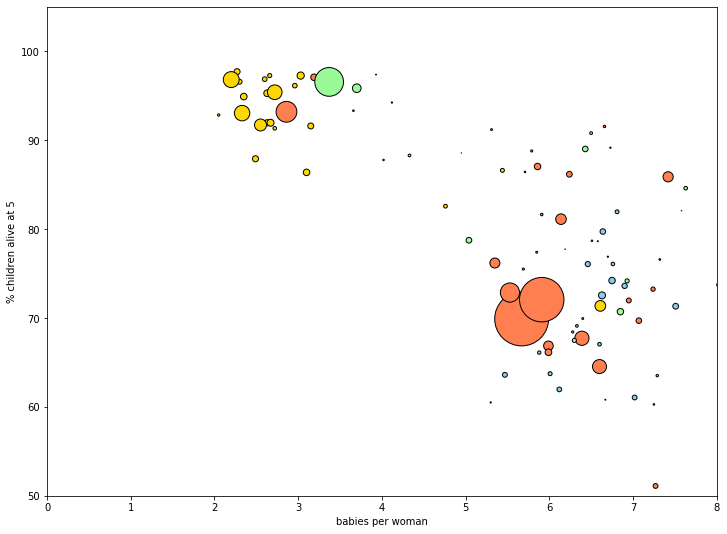

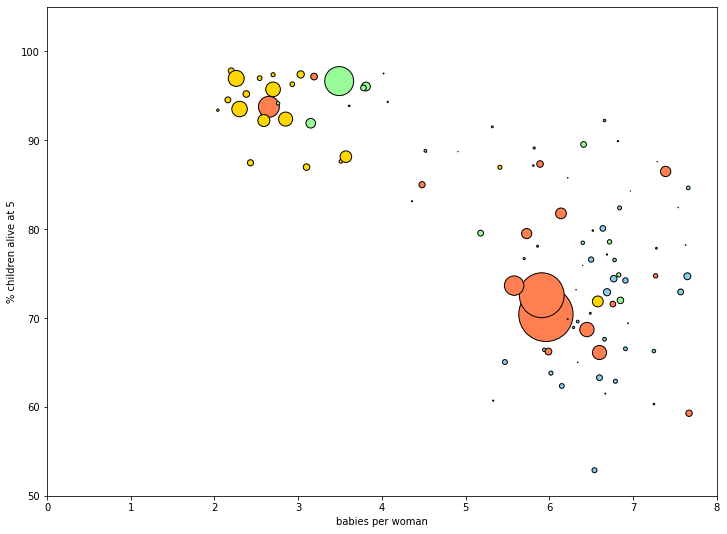

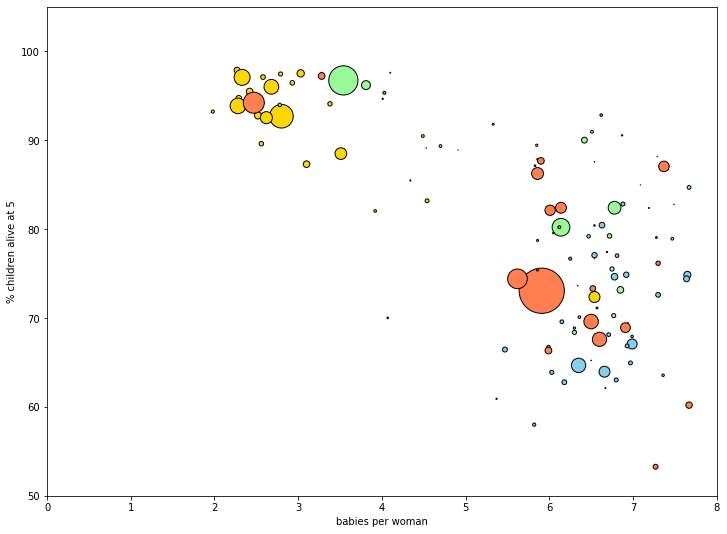

In [252]:
def plotyear(year):
    data2 = gapminder2[gapminder2.year == year]
    area = 5e-6 * data2.population
    colors  = data2.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America':'palegreen', 'Asia':'coral'})
    
    data2.plot.scatter('babies_per_woman', 'age5_surviving',
                     s = area, c=colors,
                     linewidth = 1, edgecolors='k',
                     figsize=(12,9))
    
    pp.axis(ymin=50, ymax=105, xmin=0, xmax=8)
    pp.xlabel('babies per woman')
    pp.ylabel('% children alive at 5')
    
interact(plotyear, year=widgets.IntSlider(min=1950, max=2015, step=1))